Saving legacy_products_ART_8790_69977__70611.jpg to legacy_products_ART_8790_69977__70611.jpg


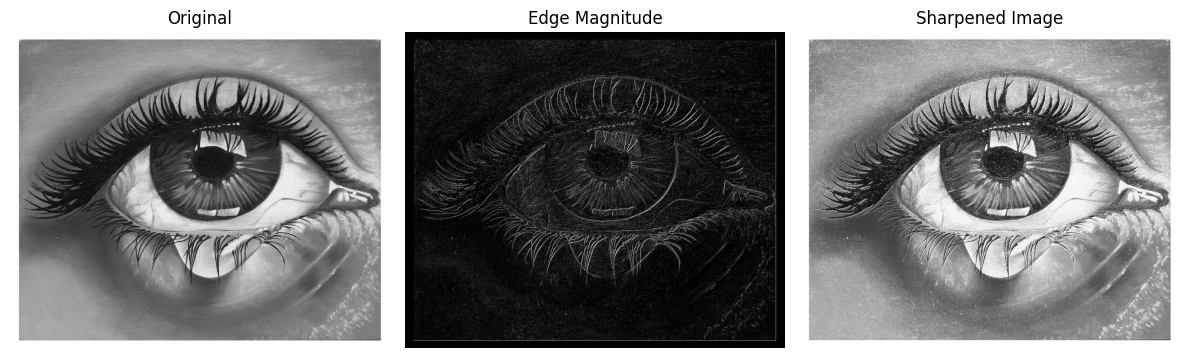

In [2]:
# STEP 1: Install libraries (if needed)
!pip install opencv-python-headless matplotlib

# STEP 2: Import required modules
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# STEP 3: Upload the image
uploaded = files.upload()
for filename in uploaded.keys():
    image_path = filename

# STEP 4: Load the image in grayscale
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# STEP 5: Define gradient masks (Prewitt or Sobel)
# Prewitt operator
kernel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

kernel_y = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
])

# STEP 6: Apply the filters
grad_x = cv2.filter2D(image, -1, kernel_x)
grad_y = cv2.filter2D(image, -1, kernel_y)

# Combine gradients using magnitude
gradient_magnitude = cv2.addWeighted(cv2.convertScaleAbs(grad_x), 0.5,
                                     cv2.convertScaleAbs(grad_y), 0.5, 0)

# STEP 7: Sharpen by adding gradient back to original
sharpened = cv2.add(image, gradient_magnitude)

# STEP 8: Display the results
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Edge Magnitude")
plt.imshow(gradient_magnitude, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Sharpened Image")
plt.imshow(sharpened, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()
